# Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
import tensorflow as tf
tf.__version__

'2.14.0'

# Q2. Load the Wine Quality dataset and explore its dimensions.

In [2]:
import pandas as pd

df = pd.read_csv('wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


# Q3. Check for null values, identify categorical variables, and encode them.

In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.duplicated().sum()

240

In [7]:
df.drop_duplicates(inplace=True , keep='first')
df.duplicated().sum()

0

In [8]:
from sklearn.preprocessing import LabelEncoder , MinMaxScaler , StandardScaler

l_encoder = LabelEncoder()

df['quality'] = l_encoder.fit_transform(df['quality'])
df.quality.unique()

array([0, 1])

# Q4. Separate the features and target variables from the dataset.

In [9]:
X = df.drop('quality' , axis=1)
y = df['quality']

# Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_temo, y_train, y_temp = train_test_split(X,y,test_size=0.2,random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temo , y_temp , test_size=0.3 , random_state=42)

# Q6. Scale the dataset using an appropriate scaling technique.

In [12]:
m_scaler = MinMaxScaler()

X_TRAIN_SCAL = m_scaler.fit_transform(X_train)
X_TEST_SCAL = m_scaler.transform(X_test)
X_VAL_SCAL = m_scaler.transform(X_val)

# Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

In [15]:
LAYERS = [
    tf.keras.layers.Dense(units=11 , input_dim=11 , activation='relu' , name='InputLayer'),
    tf.keras.layers.Dense(units=64 , activation='relu' , name='HiddenLayer1'),
    tf.keras.layers.Dense(units=32 , activation='relu' , name='HiddenLayes2'),
    tf.keras.layers.Dense(units=1 , activation='sigmoid' , name='OutputLayer')
]

# Q8. Create a Sequential model in Keras and add the previously designed layers to it.

In [16]:
model = tf.keras.models.Sequential(LAYERS)

# Q9. Print the summary of the model architecture.

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 11)                132       
                                                                 
 HiddenLayer1 (Dense)        (None, 64)                768       
                                                                 
 HiddenLayes2 (Dense)        (None, 32)                2080      
                                                                 
 OutputLayer (Dense)         (None, 1)                 33        
                                                                 
Total params: 3013 (11.77 KB)
Trainable params: 3013 (11.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

In [19]:
loss = 'binary_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']

# Q11. Compile the model with the specified loss function, optimizer, and metrics.

In [20]:
model.compile(optimizer=optimizer , 
             loss=loss , 
             metrics=metrics)

# Q13. Obtain the model's parameters (weights and biases).

In [26]:
weights = model.get_weights()

# Q14. Store the model's training history as a Pandas DataFrame.

In [27]:
history = model.fit(X_TRAIN_SCAL , y_train , epochs=10 , batch_size=32 , validation_data=(X_VAL_SCAL , y_val))

Epoch 1/10
34/34 [==============================] - 2s 15ms/step - loss: 0.6800 - accuracy: 0.5465 - val_loss: 0.6583 - val_accuracy: 0.6000
Epoch 2/10
34/34 [==============================] - 0s 4ms/step - loss: 0.6519 - accuracy: 0.6486 - val_loss: 0.6125 - val_accuracy: 0.7105
Epoch 3/10
34/34 [==============================] - 0s 3ms/step - loss: 0.6149 - accuracy: 0.7010 - val_loss: 0.5582 - val_accuracy: 0.7474
Epoch 4/10
34/34 [==============================] - 0s 3ms/step - loss: 0.5826 - accuracy: 0.7001 - val_loss: 0.5126 - val_accuracy: 0.7737
Epoch 5/10
34/34 [==============================] - 0s 4ms/step - loss: 0.5531 - accuracy: 0.7167 - val_loss: 0.4847 - val_accuracy: 0.7737
Epoch 6/10
34/34 [==============================] - 0s 3ms/step - loss: 0.5439 - accuracy: 0.7323 - val_loss: 0.4651 - val_accuracy: 0.8105
Epoch 7/10
34/34 [==============================] - 0s 3ms/step - loss: 0.5365 - accuracy: 0.7387 - val_loss: 0.4629 - val_accuracy: 0.8053
Epoch 8/10
34/34 [=

In [28]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.680000,0.546458,0.658343,0.600000
1,0.651851,0.648574,0.612464,0.710526
2,0.614853,0.701012,0.558243,0.747368
3,0.582642,0.700092,0.512552,0.773684
4,0.553119,0.716651,0.484707,0.773684


# Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

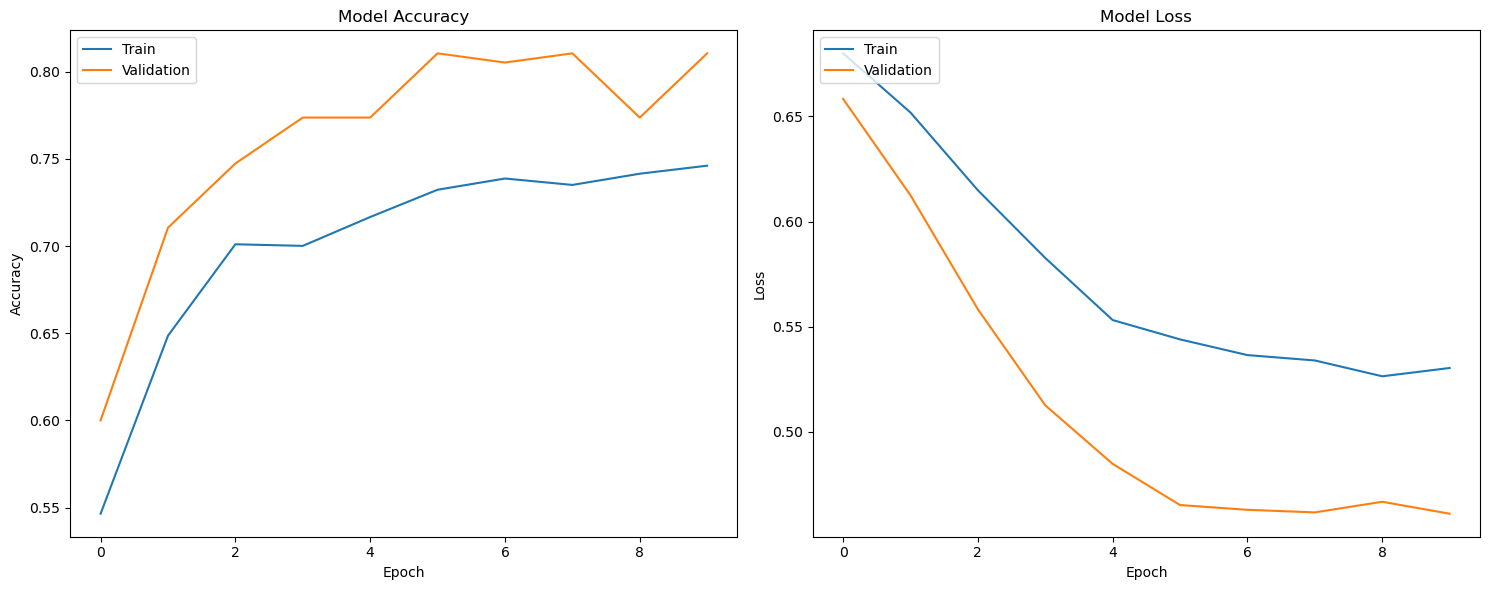

In [40]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [56]:
from sklearn.metrics import r2_score
import numpy as np

In [57]:
test_loss, test_accuracy = model.evaluate(X_TEST_SCAL, y_test)

# Make predictions
y_pred = model.predict(X_TEST_SCAL)

print(r2_score(y_pred , y_test))

3/3 [==============================] - 0s 4ms/step
-1.0746637344324617
